<a href="https://colab.research.google.com/github/1ambda/1ambda.github.io/blob/master/cosine_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install numpy pandas

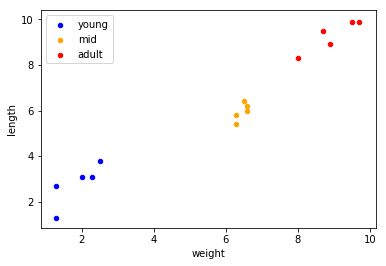

In [5]:
import numpy as np
import pandas as pd

X = np.array([[6.6, 6.2, 1],
              [9.7, 9.9, 2],
              [8.0, 8.3, 2],
              [6.3, 5.4, 1],
              [1.3, 2.7, 0],
              [2.3, 3.1, 0],
              [6.6, 6.0, 1],
              [6.5, 6.4, 1],
              [6.3, 5.8, 1],
              [9.5, 9.9, 2],
              [8.9, 8.9, 2],
              [8.7, 9.5, 2],
              [2.5, 3.8, 0],
              [2.0, 3.1, 0],
              [1.3, 1.3, 0]])

df = pd.DataFrame(X, columns=['weight', 'length', 'label'])

ax = df[df['label'] == 0].plot.scatter(x='weight', y='length', c='blue', label='young')
ax = df[df['label'] == 1].plot.scatter(x='weight', y='length', c='orange', label='mid', ax=ax)
ax = df[df['label'] == 2].plot.scatter(x='weight', y='length', c='red', label='adult', ax=ax)
ax

## 메트릭 선별

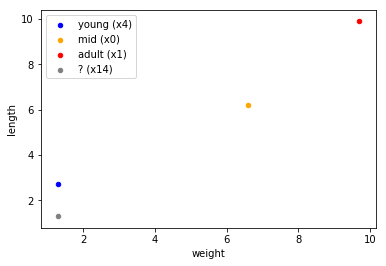

In [13]:
df2 = pd.DataFrame([df.iloc[0], df.iloc[1], df.iloc[4]], columns=['weight', 'length', 'label'])
df3 = pd.DataFrame([df.iloc[14]], columns=['weight', 'length', 'label'])

ax = df2[df2['label'] == 0].plot.scatter(x='weight', y='length', c='blue', label='young (x4)')
ax = df2[df2['label'] == 1].plot.scatter(x='weight', y='length', c='orange', label='mid (x0)', ax=ax)
ax = df2[df2['label'] == 2].plot.scatter(x='weight', y='length', c='red', label='adult (x1)', ax=ax)
ax = df3.plot.scatter(x='weight', y='length', c='gray', label='? (x14)', ax=ax)
ax

## 유클리드 거리

In [10]:
def euclidean_distance(x, y):   
    return np.sqrt(np.sum((x - y) ** 2))

x0 = X[0][:-1]
x1 = X[1][:-1]
x4 = X[4][:-1]
x14 = X[14][:-1]
print(" x0:", x0, "\n x1:", x1, "\n x4:", x4, "\nx14:", x14)
print("\n")

print(" x14 and x0:", euclidean_distance(x14, x0), "\n",
      "x14 and x1:", euclidean_distance(x14, x1), "\n",
      "x14 and x4:", euclidean_distance(x14, x4))

 x0: [6.6 6.2] 
 x1: [9.7 9.9] 
 x4: [1.3 2.7] 
x14: [1.3 1.3]


 x14 and x0: 7.218032973047436 
 x14 and x1: 12.021647141718974 
 x14 and x4: 1.4000000000000001


유클리드 거리 이용시 `x14` 는 `x4` 와 가장 가까움. 따라서 k-NN 적용시 `young` 클래스로 추측할 수 있다 

## 코사인 유사도

In [14]:
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

print(" x14 and x0:", cosine_similarity(x14, x0), "\n",
      "x14 and x1:", cosine_similarity(x14, x1), "\n",
      "x14 and x4:", cosine_similarity(x14, x4))

 x14 and x0: 0.9995120760870786 
 x14 and x1: 0.9999479424242859 
 x14 and x4: 0.9438583563660174


`x14` 가 `x1` 과 가장 유사한 것으로 표현

## 코사인 유사도를 언제 사용하는가?

**코사인 유사도는 무게나 크기는 전혀 고려하지 않고 벡터 사이의 각도만으로 측정**

벡터의 크기가 중요하지 않을 때 거리를 측정하기 위한 메트릭으로 사용. 예를 들어 문서의 길이가 다른데, `science` 단어의 포함 여부로 과학 문서로 판단하고 싶을 경우 등